<a href="https://colab.research.google.com/github/G1290-hik/ML-on-colab/blob/main/R_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Imports Needed:**

In [74]:
library(ggplot2)
library(dplyr)
library(lubridate)

##**Dataset at:** *https://www.kaggle.com/datasets/praveenluppunda/uber-dataset*

About Dataset
The dataset is taken from Uber trip records of NYC's Taxi and Limousine Commission (TLC) that can be accessed using this Link .

This dataset is a subset of the data and contains information about 100k trips.

Data Dictionary for Yellow Taxi Trip data - https://www.nyc.gov/assets/tlc/downloads/pdf/data_dictionary_trip_records_yellow.pdf

In [75]:

taxi_data <- read.csv('/content/uber_data.csv')
head(taxi_data)


,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,pickup_longitude,pickup_latitude,RatecodeID,store_and_fwd_flag,dropoff_longitude,dropoff_latitude,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount
,<int>,<chr>,<chr>,<int>,<dbl>,<dbl>,<dbl>,<int>,<chr>,<dbl>,<dbl>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,1,2016-03-01 00:00:00,2016-03-01 00:07:55,1,2.50,-73.97675,40.76515,1,N,-74.00426,40.74613,1,9.0,0.5,0.5,2.05,0.00,0.3,12.35
2,1,2016-03-01 00:00:00,2016-03-01 00:11:06,1,2.90,-73.98348,40.76793,1,N,-74.00594,40.73317,1,11.0,0.5,0.5,3.05,0.00,0.3,15.35
3,2,2016-03-01 00:00:00,2016-03-01 00:31:06,2,19.98,-73.78202,40.64481,1,N,-73.97454,40.67577,1,54.5,0.5,0.5,8.00,0.00,0.3,63.80
4,2,2016-03-01 00:00:00,2016-03-01 00:00:00,3,10.78,-73.86342,40.76981,1,N,-73.96965,40.75777,1,31.5,0.0,0.5,3.78,5.54,0.3,41.62
5,2,2016-03-01 00:00:00,2016-03-01 00:00:00,5,30.43,-73.97174,40.79218,3,N,-74.17717,40.69505,1,98.0,0.0,0.0,0.00,15.50,0.3,113.80
6,2,2016-03-01 00:00:00,2016-03-01 00:00:00,5,5.92,-74.01720,40.70538,1,N,-73.97807,40.75579,1,23.5,1.0,0.5,5.06,0.00,0.3,30.36


##**Summary of Dataset:**

In [76]:
summary(taxi_data)

    VendorID     tpep_pickup_datetime tpep_dropoff_datetime passenger_count
 Min.   :1.000   Length:52945         Length:52945          Min.   :0.000  
 1st Qu.:2.000   Class :character     Class :character      1st Qu.:1.000  
 Median :2.000   Mode  :character     Mode  :character      Median :1.000  
 Mean   :1.999                                              Mean   :2.028  
 3rd Qu.:2.000                                              3rd Qu.:2.000  
 Max.   :2.000                                              Max.   :6.000  
                                                            NA's   :1      
 trip_distance    pickup_longitude  pickup_latitude   RatecodeID   
 Min.   : 0.000   Min.   :-121.93   Min.   : 0.00   Min.   :1.000  
 1st Qu.: 0.960   1st Qu.: -73.99   1st Qu.:40.74   1st Qu.:1.000  
 Median : 1.560   Median : -73.98   Median :40.76   Median :1.000  
 Mean   : 2.671   Mean   : -73.39   Mean   :40.43   Mean   :1.028  
 3rd Qu.: 2.710   3rd Qu.: -73.96   3rd Qu.:40.77   

### **Data Filteration:**

In [77]:
# Filtering out passenger count values (0 and n.a)
filtered_pcdata <- taxi_data %>%
  filter(passenger_count != 0 & !is.na(passenger_count))

In [78]:
# Filtering out hoax payment_type values
filtered_payment <- taxi_data %>%
  filter(payment_type != 3 & payment_type != 4 & !is.na(passenger_count))

### **Histogram of trip distances**

Warning message:
“Removed 1 rows containing non-finite values (`stat_bin()`).”


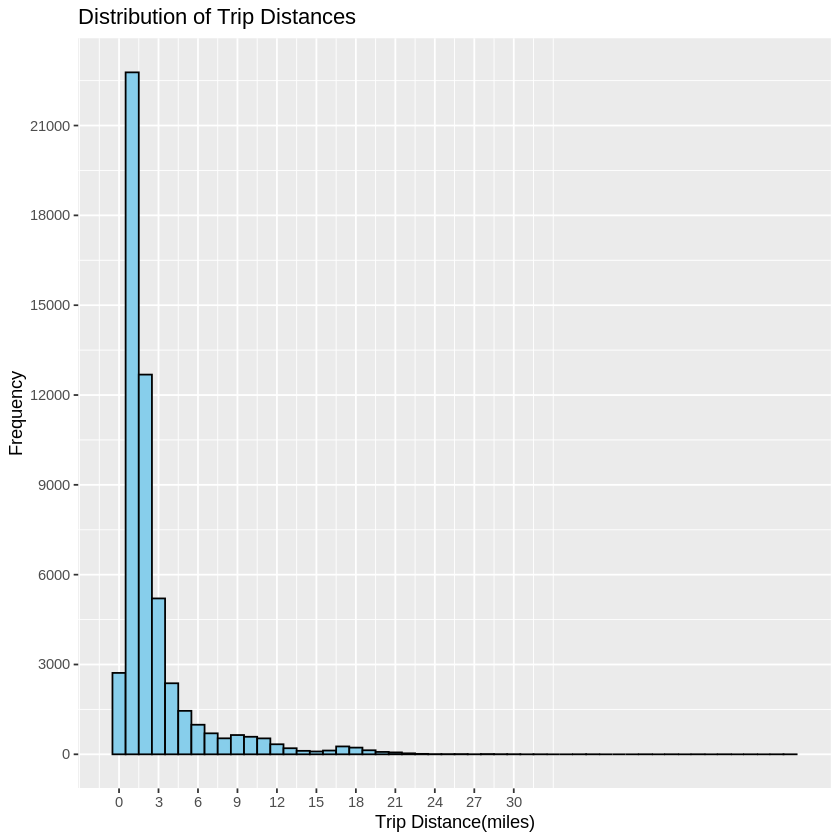

In [79]:
ggplot(taxi_data, aes(x = trip_distance)) +
  geom_histogram(binwidth = 1, fill = "skyblue", color = "black") +
  labs(title = "Distribution of Trip Distances", x = "Trip Distance(miles)", y = "Frequency") +
  scale_x_continuous(breaks = seq(0, 30, by = 3)) + scale_y_continuous(breaks = seq(0, 24000, by = 3000))


### **Scatter plot of trip distance vs. fare amount**

Warning message:
“Removed 1 rows containing missing values (`geom_point()`).”


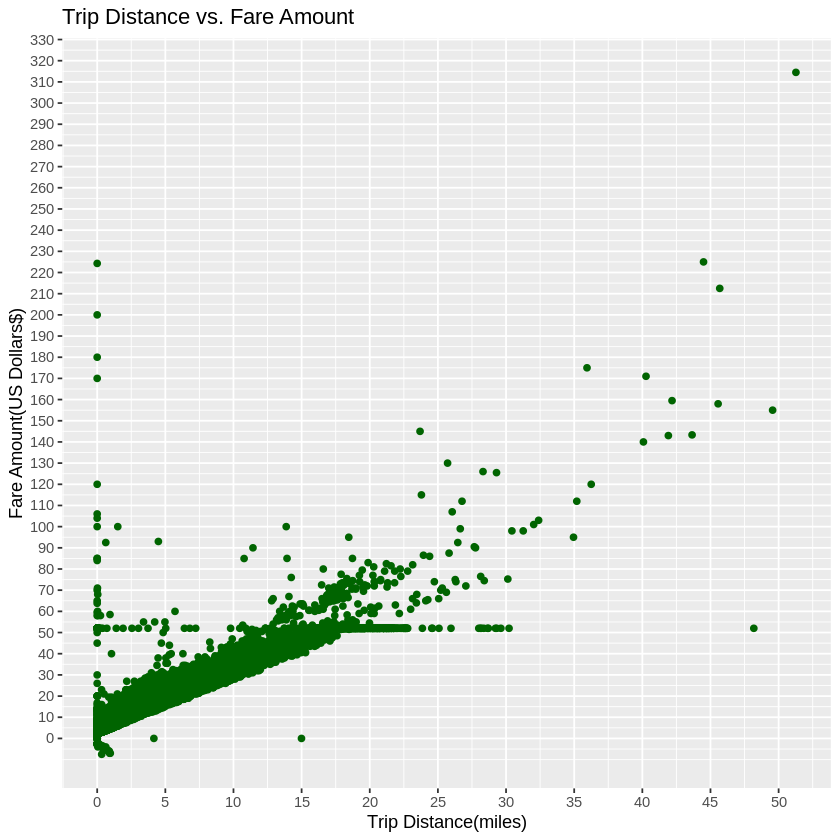

In [80]:
ggplot(taxi_data, aes(x = trip_distance, y = fare_amount)) +
  geom_point(color = "darkgreen") +
  labs(title = "Trip Distance vs. Fare Amount", x = "Trip Distance(miles)", y = "Fare Amount(US Dollars$)")+
  scale_x_continuous(breaks = seq(0, 50, by = 5)) + scale_y_continuous(breaks = seq(0, 330, by = 10))

### **Bar plot of passenger counts**

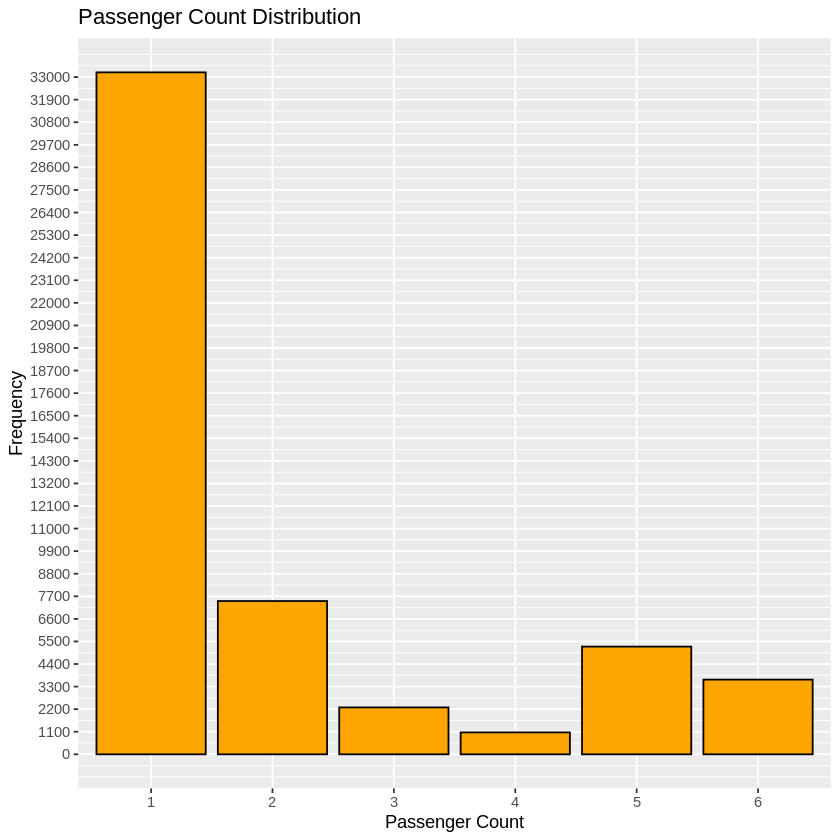

In [81]:
ggplot(filtered_pcdata, aes(x = factor(passenger_count))) +
  geom_bar(fill = "orange", color = "black") +
  labs(title = "Passenger Count Distribution", x = "Passenger Count", y = "Frequency")+
  scale_y_continuous(breaks = seq(0, 33000, by = 1100))+scale_x_discrete(breaks = seq(1, 6, by = 1))


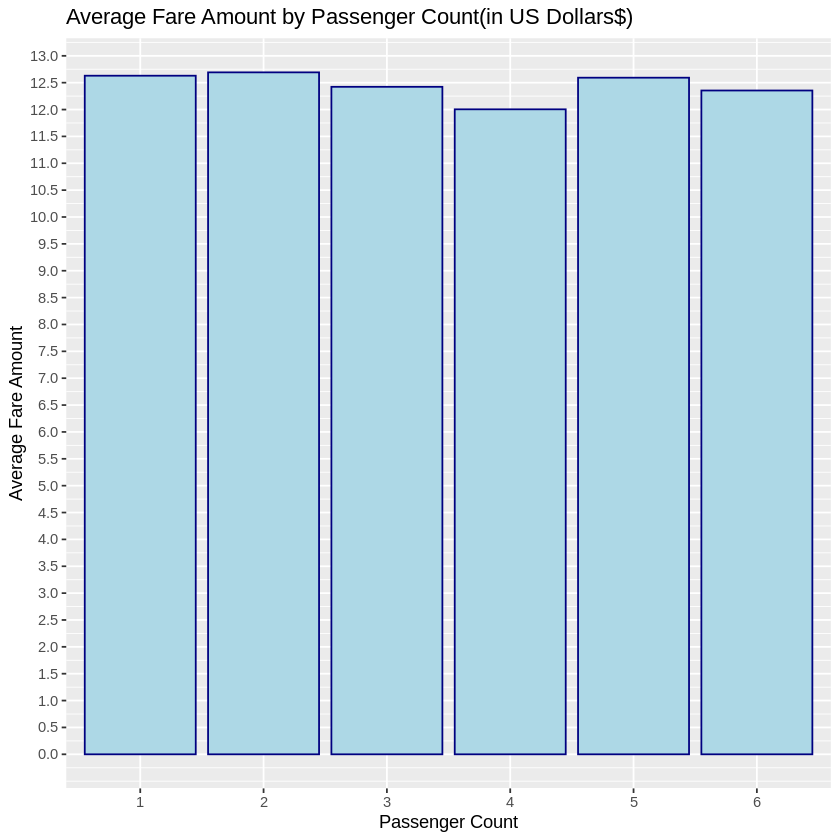

In [82]:
ggplot(filtered_pcdata, aes(x = factor(passenger_count), y = fare_amount)) +
  geom_bar(stat = "summary", fun = "mean", fill = "lightblue", color = "navy") +
  labs(title = "Average Fare Amount by Passenger Count(in US Dollars$)", x = "Passenger Count", y = "Average Fare Amount")+
  scale_y_continuous(breaks = seq(0, 13, by = 0.5))+scale_x_discrete(breaks = seq(1, 6, by = 1))

## **Barplot for Payment Type:**

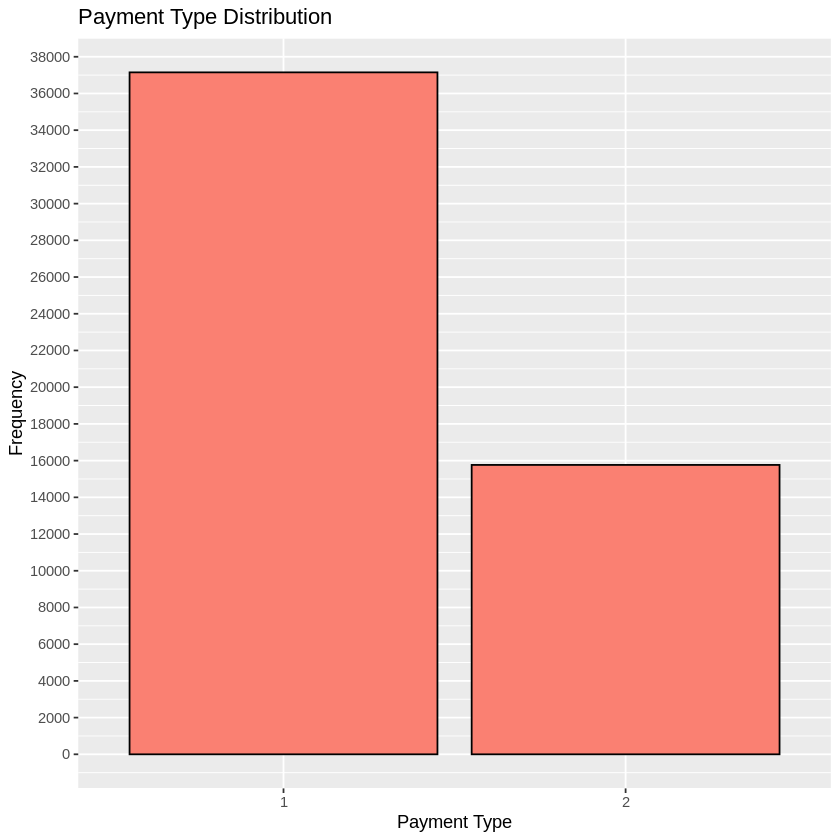

In [83]:
ggplot(filtered_payment, aes(x = factor(payment_type))) +
  geom_bar(fill = "salmon", color = "black") +
  labs(title = "Payment Type Distribution", x = "Payment Type", y = "Frequency")+
  scale_y_continuous(breaks=seq(0, 38000, by=2000))


### **Density Plot for Trip Distance:**

Warning message:
“Removed 1 rows containing non-finite values (`stat_density()`).”


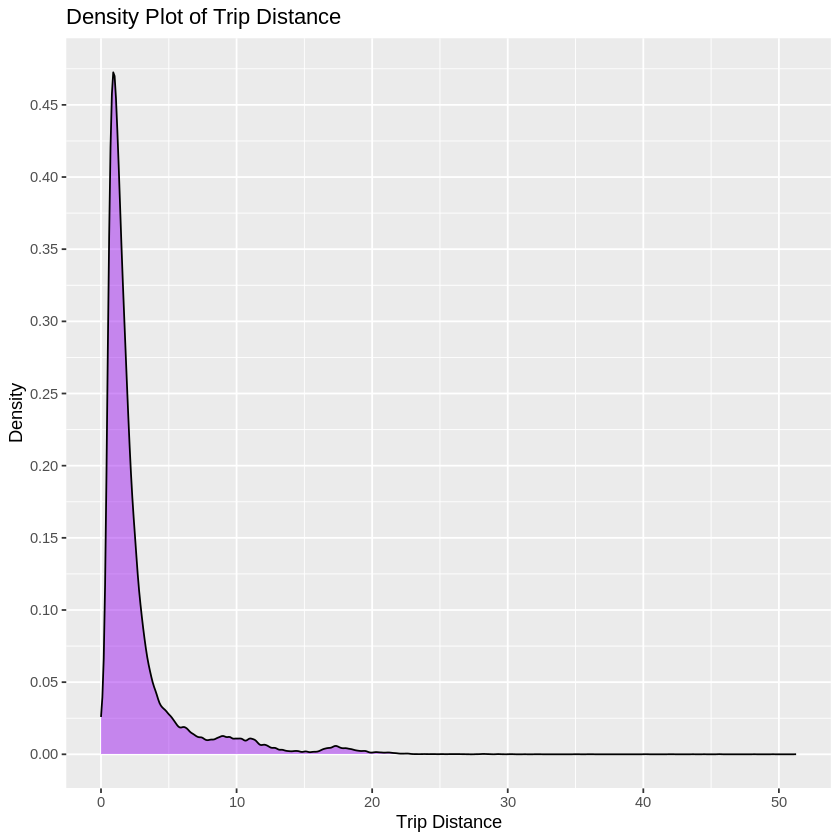

In [84]:
ggplot(taxi_data, aes(x = trip_distance)) +
  geom_density(fill = "purple", alpha = 0.5) +
  labs(title = "Density Plot of Trip Distance", x = "Trip Distance", y = "Density")+
  scale_y_continuous(breaks = seq(0, 0.5, by = 0.05))

